In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

In [2]:
data=pd.read_csv("gas_turbines.csv")

In [3]:
#EDA
data.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [4]:
data.tail()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227
15038,6.9279,1007.2,97.533,3.4275,19.306,1049.9,545.85,111.58,10.583,4.9816,92.498


In [5]:
data.shape

(15039, 11)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [7]:
data[data.duplicated()].shape

(0, 11)

In [9]:
from sklearn.ensemble import IsolationForest
# training the model
clf = IsolationForest(random_state=5,contamination=.01)
clf.fit(data)
# predictions
y_pred_outliers = clf.predict(data)
y_pred_outliers

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


array([1, 1, 1, ..., 1, 1, 1])

In [10]:
data['anomaly']=clf.predict(data.iloc[:,0:11])

In [11]:
#Print the outlier data points
data[data['anomaly']==-1]

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX,anomaly
44,4.3930,1021.50,86.622,3.8506,21.467,1037.9,528.08,116.72,11.141,31.97100,99.229,-1
112,15.3990,996.84,74.237,3.9852,22.193,1048.3,534.51,118.99,11.137,27.25000,83.232,-1
135,15.3270,992.42,77.042,3.9868,22.330,1049.8,535.33,119.04,11.208,26.99900,80.448,-1
155,7.0444,1006.40,96.843,4.0069,22.229,1048.1,532.44,121.93,11.328,31.53800,87.493,-1
197,5.5817,1016.70,85.499,3.8489,21.035,1035.4,527.44,114.07,11.064,35.01900,97.863,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
14909,3.6984,1028.10,87.139,3.4336,19.777,1036.5,532.36,113.61,10.754,9.47220,116.460,-1
14911,3.5880,1028.80,88.069,3.4599,19.850,1044.5,537.32,115.65,10.785,8.27820,97.853,-1
14912,3.4638,1028.80,88.841,3.4958,19.821,1045.1,537.71,115.70,10.762,8.04340,96.572,-1
14924,7.6297,1031.20,71.868,5.4832,34.973,1100.3,519.11,168.91,14.744,0.79555,58.099,-1


In [12]:
data =data[data.anomaly!=-1]
data.shape

(14888, 12)

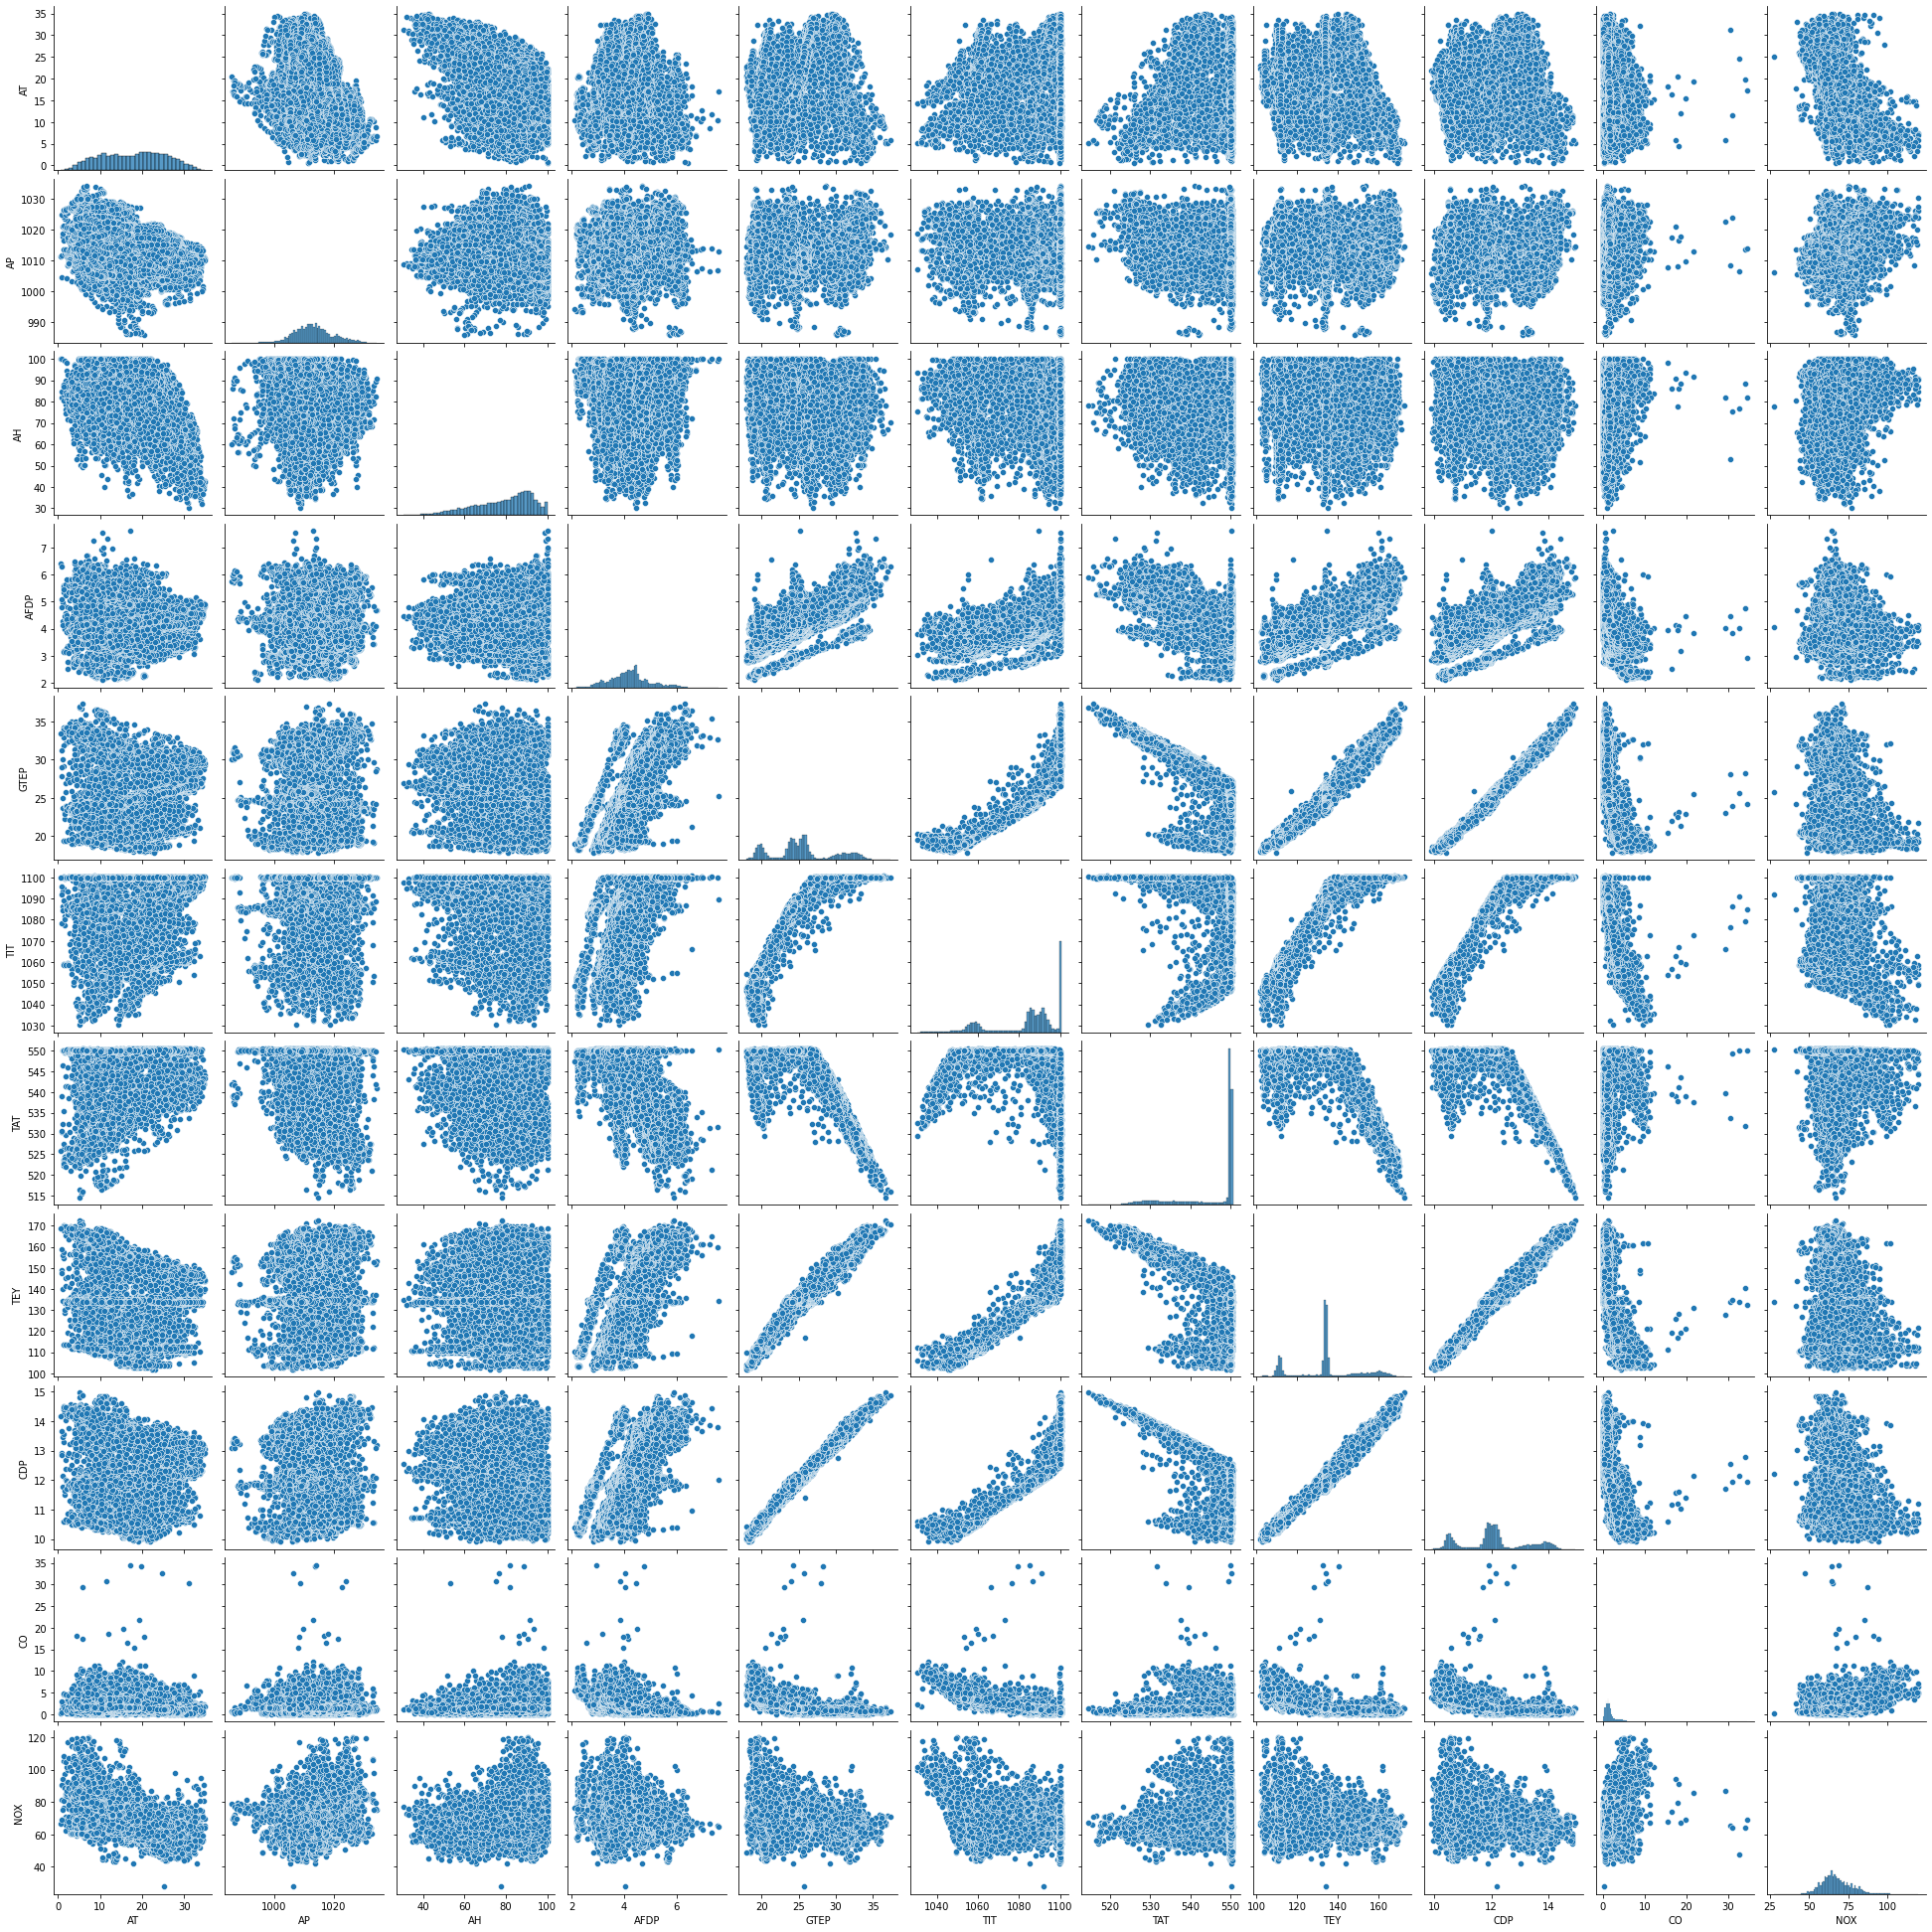

In [13]:
data=data.iloc[:,0:11]
sns.pairplot(data)

In [15]:
#Split data in X & y 
X=data.drop('TEY',axis=1)
Y= data.loc[:,['TEY']]

In [16]:
#to scaled data use standard scalar
scaled = StandardScaler()
X= scaled.fit_transform(X)
Y= scaled.fit_transform(Y)

In [17]:
# Model 1
import keras
from sklearn.model_selection import KFold
from keras.wrappers.scikit_learn import KerasRegressor
from keras.models import Sequential
from keras.layers import InputLayer,Dense

In [18]:
model = Sequential()
model.add(Dense(16,input_dim=10,activation='relu'))
model.add(Dense(12,input_dim=10,activation='relu'))
model.add(Dense(8,input_dim=10,activation='relu'))
model.add(Dense(1,activation='linear'))
model.compile(loss = 'mean_squared_error',optimizer ='adam',metrics=['mse'])
model.fit(X, Y, validation_split=0.33, epochs=50, batch_size=100)
y_preds=model.predict(X)

Epoch 1/50
100/100 [==============================] - 4s 11ms/step - loss: 0.5059 - mse: 0.5059 - val_loss: 0.0890 - val_mse: 0.0890
Epoch 2/50
100/100 [==============================] - 1s 6ms/step - loss: 0.0489 - mse: 0.0489 - val_loss: 0.0289 - val_mse: 0.0289
Epoch 3/50
100/100 [==============================] - 1s 5ms/step - loss: 0.0196 - mse: 0.0196 - val_loss: 0.0156 - val_mse: 0.0156
Epoch 4/50
100/100 [==============================] - 1s 6ms/step - loss: 0.0110 - mse: 0.0110 - val_loss: 0.0107 - val_mse: 0.0107
Epoch 5/50
100/100 [==============================] - 1s 5ms/step - loss: 0.0078 - mse: 0.0078 - val_loss: 0.0082 - val_mse: 0.0082
Epoch 6/50
100/100 [==============================] - 1s 6ms/step - loss: 0.0062 - mse: 0.0062 - val_loss: 0.0067 - val_mse: 0.0067
Epoch 7/50
100/100 [==============================] - 1s 6ms/step - loss: 0.0052 - mse: 0.0052 - val_loss: 0.0059 - val_mse: 0.0059
Epoch 8/50
100/100 [==============================] - 1s 6ms/step - loss: 0

In [19]:
# evaluate the model
scores = model.evaluate(X, Y)
print((model.metrics_names[1], scores[1]*100))

466/466 [==============================] - 1s 3ms/step - loss: 0.0016 - mse: 0.0016
('mse', 0.16443158965557814)


In [20]:
#Model 2
model = Sequential()
model.add(Dense(10,input_dim=10,activation='tanh'))
model.add(Dense(8,input_dim=10,activation='tanh'))
model.add(Dense(4,input_dim=10,activation='tanh'))
model.add(Dense(1,activation='linear'))
model.compile(loss = 'mean_squared_error',optimizer ='adam',metrics=['mse'])
model.fit(X, Y, validation_split=0.33, epochs=30, batch_size=150)
y_preds=model.predict(X)

Epoch 1/30
67/67 [==============================] - 4s 15ms/step - loss: 1.1548 - mse: 1.1548 - val_loss: 0.6570 - val_mse: 0.6570
Epoch 2/30
67/67 [==============================] - 0s 7ms/step - loss: 0.5149 - mse: 0.5149 - val_loss: 0.3120 - val_mse: 0.3120
Epoch 3/30
67/67 [==============================] - 0s 6ms/step - loss: 0.2379 - mse: 0.2379 - val_loss: 0.1326 - val_mse: 0.1326
Epoch 4/30
67/67 [==============================] - 0s 6ms/step - loss: 0.1077 - mse: 0.1077 - val_loss: 0.0814 - val_mse: 0.0814
Epoch 5/30
67/67 [==============================] - 0s 6ms/step - loss: 0.0747 - mse: 0.0747 - val_loss: 0.0636 - val_mse: 0.0636
Epoch 6/30
67/67 [==============================] - 0s 6ms/step - loss: 0.0590 - mse: 0.0590 - val_loss: 0.0498 - val_mse: 0.0498
Epoch 7/30
67/67 [==============================] - 0s 6ms/step - loss: 0.0478 - mse: 0.0478 - val_loss: 0.0416 - val_mse: 0.0416
Epoch 8/30
67/67 [==============================] - 0s 7ms/step - loss: 0.0393 - mse: 0.0

In [21]:
# evaluate the model
scores = model.evaluate(X, Y)
print((model.metrics_names[1], scores[1]*100))

466/466 [==============================] - 2s 3ms/step - loss: 0.0058 - mse: 0.0058
('mse', 0.581085542216897)


In [22]:
#Model 3
model = Sequential()
model.add(Dense(20,input_dim=10,activation='softmax'))
model.add(Dense(16,input_dim=10,activation='softmax'))
model.add(Dense(12,input_dim=10,activation='softmax'))
model.add(Dense(1,activation='linear'))
model.compile(loss = 'mean_squared_error',optimizer ='adam',metrics=['mse'])
model.fit(X, Y, validation_split=0.33, epochs=60, batch_size=300)
y_preds=model.predict(X)

Epoch 1/60
34/34 [==============================] - 3s 22ms/step - loss: 1.0281 - mse: 1.0281 - val_loss: 0.9818 - val_mse: 0.9818
Epoch 2/60
34/34 [==============================] - 0s 8ms/step - loss: 1.0216 - mse: 1.0216 - val_loss: 0.9681 - val_mse: 0.9681
Epoch 3/60
34/34 [==============================] - 0s 9ms/step - loss: 1.0183 - mse: 1.0183 - val_loss: 0.9634 - val_mse: 0.9634
Epoch 4/60
34/34 [==============================] - 0s 8ms/step - loss: 1.0135 - mse: 1.0135 - val_loss: 0.9559 - val_mse: 0.9559
Epoch 5/60
34/34 [==============================] - 0s 8ms/step - loss: 1.0054 - mse: 1.0054 - val_loss: 0.9463 - val_mse: 0.9463
Epoch 6/60
34/34 [==============================] - 0s 8ms/step - loss: 0.9914 - mse: 0.9914 - val_loss: 0.9286 - val_mse: 0.9286
Epoch 7/60
34/34 [==============================] - 0s 8ms/step - loss: 0.9695 - mse: 0.9695 - val_loss: 0.9060 - val_mse: 0.9060
Epoch 8/60
34/34 [==============================] - 0s 7ms/step - loss: 0.9367 - mse: 0.9

In [23]:
# evaluate the model
scores = model.evaluate(X, Y)
print((model.metrics_names[1], scores[1]*100))

466/466 [==============================] - 2s 4ms/step - loss: 0.0062 - mse: 0.0062
('mse', 0.6218875292688608)


In [24]:
#Model 4
model_4= Sequential()
model_4.add(Dense(100,input_dim=10,activation='relu'))
model_4.add(Dense(60,input_dim=10,activation='relu'))
model_4.add(Dense(50,input_dim=10,activation='relu'))
model_4.add(Dense(30,input_dim=10,activation='relu'))
model_4.add(Dense(1,activation='linear'))
model_4.compile(loss = 'mean_squared_error',optimizer ='adam',metrics=['mse'])
model_4.fit(X, Y, validation_split=0.3, epochs=60, batch_size=150)
y_preds=model_4.predict(X)

Epoch 1/60
70/70 [==============================] - 4s 15ms/step - loss: 0.0941 - mse: 0.0941 - val_loss: 0.0056 - val_mse: 0.0056
Epoch 2/60
70/70 [==============================] - 1s 9ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0036 - val_mse: 0.0036
Epoch 3/60
70/70 [==============================] - 1s 8ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 4/60
70/70 [==============================] - 1s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 5/60
70/70 [==============================] - 1s 9ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 6/60
70/70 [==============================] - 0s 7ms/step - loss: 0.0018 - mse: 0.0018 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 7/60
70/70 [==============================] - 1s 9ms/step - loss: 0.0017 - mse: 0.0017 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 8/60
70/70 [==============================] - 1s 8ms/step - loss: 0.0015 - mse: 0.0

In [25]:
# evaluate the model
scores = model_4.evaluate(X, Y)
print((model.metrics_names[1], scores[1]*100))

466/466 [==============================] - 2s 3ms/step - loss: 0.0013 - mse: 0.0013
('mse', 0.12800500262528658)


In [26]:
#Model 5
from keras.layers import Dropout
from keras.optimizers import Adam
model = Sequential()
model.add(Dense(100,input_dim=10,activation='relu'))
model.add(Dropout(0.001))
model.add(Dense(60,input_dim=10,activation='relu'))
model.add(Dropout(0.001))
model.add(Dense(20,input_dim=10,activation='relu'))
model.add(Dropout(0.001))
model.add(Dense(1,activation='linear'))
adam=Adam(lr=0.0001)
model.compile(loss = 'mean_squared_error',optimizer =adam,metrics=['mse'])
model.fit(X, Y, validation_split=0.3, epochs=100, batch_size=500)
y_preds=model.predict(X)

Epoch 1/100


C:\Users\LENOVO\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


21/21 [==============================] - 3s 40ms/step - loss: 1.0937 - mse: 1.0937 - val_loss: 0.9620 - val_mse: 0.9620
Epoch 2/100
21/21 [==============================] - 0s 17ms/step - loss: 0.8837 - mse: 0.8837 - val_loss: 0.8011 - val_mse: 0.8011
Epoch 3/100
21/21 [==============================] - 0s 16ms/step - loss: 0.6722 - mse: 0.6722 - val_loss: 0.6247 - val_mse: 0.6247
Epoch 4/100
21/21 [==============================] - 0s 18ms/step - loss: 0.4752 - mse: 0.4752 - val_loss: 0.4437 - val_mse: 0.4437
Epoch 5/100
21/21 [==============================] - 0s 17ms/step - loss: 0.3012 - mse: 0.3012 - val_loss: 0.2875 - val_mse: 0.2875
Epoch 6/100
21/21 [==============================] - 0s 19ms/step - loss: 0.1725 - mse: 0.1725 - val_loss: 0.1718 - val_mse: 0.1718
Epoch 7/100
21/21 [==============================] - 0s 18ms/step - loss: 0.0956 - mse: 0.0956 - val_loss: 0.1044 - val_mse: 0.1044
Epoch 8/100
21/21 [==============================] - 0s 18ms/step - loss: 0.0606 - mse: 

Epoch 63/100
21/21 [==============================] - 0s 19ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0065 - val_mse: 0.0065
Epoch 64/100
21/21 [==============================] - 0s 16ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0064 - val_mse: 0.0064
Epoch 65/100
21/21 [==============================] - 0s 17ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0062 - val_mse: 0.0062
Epoch 66/100
21/21 [==============================] - 0s 17ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0064 - val_mse: 0.0064
Epoch 67/100
21/21 [==============================] - 0s 17ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 0.0062 - val_mse: 0.0062
Epoch 68/100
21/21 [==============================] - 0s 17ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0061 - val_mse: 0.0061
Epoch 69/100
21/21 [==============================] - 0s 16ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 0.0061 - val_mse: 0.0061
Epoch 70/100
21/21 [==============================] - 0s 16ms/step - 

In [27]:
# evaluate the model
scores = model.evaluate(X, Y)
print((model.metrics_names[1], scores[1]*100))

466/466 [==============================] - 1s 3ms/step - loss: 0.0029 - mse: 0.0029
('mse', 0.2907720161601901)


466/466 [==============================] - 1s 3ms/step


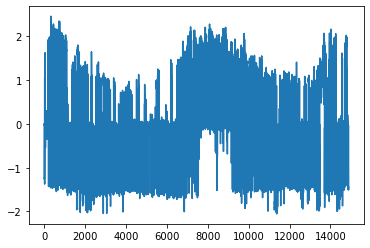

In [29]:
#Through Model4
plt.plot(model_4.predict(X))